In [58]:
import numpy as np
# import pandas as pd
from xclib.data import data_utils
import matplotlib.pylab as plt
from random import seed
from random import randrange
import math
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import time

In [2]:
# paths
data_folder_path = './data/'
train_x_path = data_folder_path + 'train_x.txt'
train_y_path = data_folder_path + 'train_y.txt'
test_x_path = data_folder_path + 'test_x.txt'
test_y_path = data_folder_path + 'test_y.txt'
val_x_path = data_folder_path + 'valid_x.txt'
val_y_path = data_folder_path + 'valid_y.txt'

In [3]:
def load_y(path, size):
    y = np.ones(size)
    f = open(path)
    cnt = 0
    for x in f:
        y[cnt] = int(x)
        cnt += 1
    return y

In [4]:
train_x = data_utils.read_sparse_file(train_x_path)
train_y = load_y(train_y_path, train_x.shape[0])

/home/karan/.local/lib/python3.6/site-packages/xclib-0.96-py3.6-linux-x86_64.egg/xclib/data/data_utils.py:173: UserWarning: Header mis-match from inferred shape!
  warnings.warn("Header mis-match from inferred shape!")


In [48]:
test_x = data_utils.read_sparse_file(test_x_path)
test_y = load_y(test_y_path, test_x.shape[0])

/home/karan/.local/lib/python3.6/site-packages/xclib-0.96-py3.6-linux-x86_64.egg/xclib/data/data_utils.py:173: UserWarning: Header mis-match from inferred shape!
  warnings.warn("Header mis-match from inferred shape!")


In [49]:
val_x = data_utils.read_sparse_file(val_x_path)
val_y = load_y(val_y_path, val_x.shape[0])

In [37]:
clf = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=26, random_state=42, oob_score=True, n_jobs=-1, min_samples_split=5, min_samples_leaf=5, max_features=None)

In [38]:
model = clf.fit(train_x, train_y)
print('=============REPORT=============')
print('Train Accuracy', model.score(train_x, train_y))
print('Test Accuracy: ', model.score(test_x,test_y))
print('Number of features: %d' % model.n_features_)
print('Number of Classes: %d' % model.n_classes_)
print('Confidence for each sample: \n', model.oob_decision_function_)

=============REPORT=============
Train Accuracy 0.863721354287392
Test Accuracy:  0.8070647135175227
Number of features: 482
Number of Classes: 2
Confidence for each sample: 
 [[1.         0.        ]
 [0.7615143  0.2384857 ]
 [0.96908497 0.03091503]
 ...
 [0.         1.        ]
 [0.01058716 0.98941284]
 [0.24926934 0.75073066]]


# Report
Train Accuracy 0.863721354287392
Test Accuracy:  0.8070647135175227
clf = RandomForestClassifier(n_estimators=250, criterion='entropy', max_depth=26, random_state=42, oob_score=True, n_jobs=-1, min_samples_split=5, min_samples_leaf=5, max_features=None)
Number of features: 482
Number of Classes: 2

In [46]:
#gridSearchCV
clf = RandomForestClassifier(n_estimators=250, 
                             criterion='entropy', 
                             max_depth=26, 
                             random_state=42, 
                             oob_score=True, 
                             n_jobs=-1, 
                             min_samples_split=5, 
                             min_samples_leaf=5)

# parameters = [{
#                   'max_depth': [i for i in range(15, 20)],
#                   'min_samples_split': [i for i in range(2, 8)],
#                   'max_features': ('log2', 'sqrt'),
#                   'n_estimators': [100, 250]
#               },
#               {
#                   'max_depth': [i for i in range(20, 30)],
#                   'min_samples_split': [i for i in range(8, 12)],
#                   'max_features': ('log2', 'sqrt'),
#                   'n_estimators': [100, 250]
#               }
#              ]

parameters = [{
                  'max_depth': [i for i in range(15, 20, 3)],
                  'min_samples_split': [i for i in range(2, 3)],
                  'max_features': ('log2', 'sqrt'),
                  'n_estimators': [250]
              },
              {
                  'max_depth': [i for i in range(20, 30, 3)],
                  'min_samples_split': [i for i in range(3, 5)],
                  'max_features': ('log2', 'sqrt'),
                  'n_estimators': [250]
              }
             ]

grid = GridSearchCV(clf, parameters, cv=2, n_jobs=None)
grid

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='entropy', max_depth=26,
                                              max_features=2,
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=5,
                                              min_samples_split=5,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=250, n_jobs=-1,
                                              oob...
                                              verbose=0, warm_st

In [50]:
# grid.fit(train_x, train_y)

In [61]:
# Part - d: Parameter Senstivity analysis

# changing max_depth
l_x = []
l_depth_t = []
l_depth_v = []
plt.title('Accuracy v/s max_depth')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
# start = time.time()
for i in range(5, 25):
    clf = RandomForestClassifier(n_estimators=250, 
                             criterion='entropy', 
                             max_depth=i, 
                             random_state=42, 
                             oob_score=True, 
                             n_jobs=-1, 
                             min_samples_split=5, 
                             min_samples_leaf=5, 
                             max_features='sqrt')
    model = clf.fit(train_x, train_y)
    l_x.append(i)
    l_depth_t.append(model.score(test_x,test_y))
    l_depth_v.append(model.score(val_x, val_y))
    print(i)
# print((time.time()-start)/60)
plt.plot(l_x, l_depth_t, label='test acc')
plt.plot(l_x, l_depth_v, label='val acc')
plt.legend(loc = 'upper right')
plt.savefig('senstivity_depth.png')

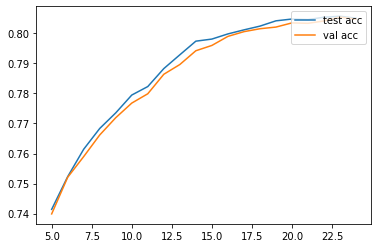

In [60]:
# print('Time taken: %s minutes' % (time.time()-start)/60)
plt.plot(l_x, l_depth_t, label='test acc')
plt.plot(l_x, l_depth_v, label='val acc')
plt.legend(loc = 'upper right')
plt.savefig('senstivity_depth.png')

In [73]:
print('l_depth_t:\n', l_depth_t)
print('max test accuracy: %s | Depth at max accuracy: %s'% (max(l_depth_t), l_x[l_depth_t.index(max(l_depth_t))]))
print('l_depth_v:\n', l_depth_v)
print('max validation accuracy: %s | Depth at max accuracy: %s'% (max(l_depth_v), l_x[l_depth_v.index(max(l_depth_v))]))

l_depth_t:
 [0.7414120810347226, 0.7523063372119976, 0.7614389689861388, 0.7683463909879005, 0.7735385471234528, 0.7794724398497983, 0.7823003106021974, 0.7882805618654676, 0.7928700570210004, 0.7974131936396087, 0.7981085716934774, 0.7998238375596867, 0.8011682351304993, 0.8024199156274628, 0.8041815400305966, 0.8047842010106161, 0.8045987668629178, 0.8053868619906356, 0.8057113717491076, 0.8050623522321636]
max test accuracy: 0.8057113717491076 | Depth at max accuracy: 23
l_depth_v:
 [0.7398943074355646, 0.7520860374559615, 0.7589931392545893, 0.7661783793806787, 0.7719265714815502, 0.7767939922121269, 0.7798998702021138, 0.7863897645095494, 0.7896347116632672, 0.7942239940663823, 0.795985536806972, 0.7989987020211385, 0.8005748192100871, 0.8015483033562025, 0.8021045800111255, 0.8034952716484332, 0.8033562024847024, 0.8041442610791767, 0.8054422399406638, 0.8047468941220101]
max validation accuracy: 0.8054422399406638 | Depth at max accuracy: 23


4
5
6
7
8
9
10
11
12
13
14


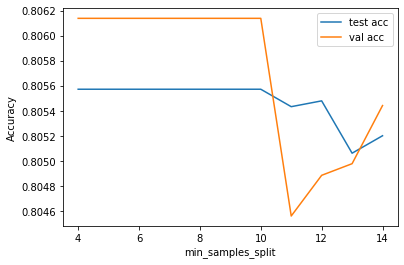

In [74]:
# changing min_samples_split
l_x = []
l_min_samples_split_t = []
l_min_samples_split_v = []
plt.xlabel('min_samples_split')
plt.ylabel('Accuracy')
for i in range(4, 15):
    clf = RandomForestClassifier(n_estimators=250, 
                             criterion='entropy', 
                             max_depth=26, 
                             random_state=42, 
                             oob_score=True, 
                             n_jobs=-1, 
                             min_samples_split=i, 
                             min_samples_leaf=5, 
                             max_features='sqrt')
    model = clf.fit(train_x, train_y)
    l_x.append(i)
    l_min_samples_split_t.append(model.score(test_x,test_y))
    l_min_samples_split_v.append(model.score(val_x, val_y))
    print(i)

plt.plot(l_x, l_min_samples_split_t, label='test acc')
plt.plot(l_x, l_min_samples_split_v, label='val acc')
plt.legend(loc = 'upper right')
plt.savefig('senstivity_min_samples_split.png')

In [75]:
print('l_min_samples_split_t:\n', l_min_samples_split_t)
print('max test accuracy: %s | Sample split value: %s'% (max(l_min_samples_split_t), l_x[l_min_samples_split_t.index(max(l_min_samples_split_t))]))
print('l_min_samples_split_v:\n', l_min_samples_split_v)
print('max validation accuracy: %s | Sample split value: %s'% (max(l_min_samples_split_v), l_x[l_min_samples_split_v.index(max(l_min_samples_split_v))]))

l_min_samples_split_t:
 [0.8055722961383339, 0.8055722961383339, 0.8055722961383339, 0.8055722961383339, 0.8055722961383339, 0.8055722961383339, 0.8055722961383339, 0.8054332205275602, 0.8054795790644848, 0.8050623522321636, 0.8052014278429372]
max test accuracy: 0.8055722961383339 | Sample split value: 4
l_min_samples_split_v:
 [0.8061375857593176, 0.8061375857593176, 0.8061375857593176, 0.8061375857593176, 0.8061375857593176, 0.8061375857593176, 0.8061375857593176, 0.804561468570369, 0.8048859632857408, 0.8049786760615613, 0.8054422399406638]
max validation accuracy: 0.8061375857593176 | Sample split value: 4


In [ ]:
# changing max_features
l_x = []
l_max_features_t = []
l_max_features_v = []
plt.xlabel('max_features')
plt.ylabel('Accuracy')
for i in range(20, 300, 10):
    clf = RandomForestClassifier(n_estimators=250, 
                             criterion='entropy', 
                             max_depth=26, 
                             random_state=42, 
                             oob_score=True, 
                             n_jobs=-1, 
                             min_samples_split=5, 
                             min_samples_leaf=5, 
                             max_features=i)
    model = clf.fit(train_x, train_y)
    l_x.append(i)
    l_max_features_t.append(model.score(test_x,test_y))
    l_max_features_v.append(model.score(val_x, val_y))
    print(i)

plt.plot(l_x, l_max_features_t, label='test acc')
plt.plot(l_x, l_max_features_v, label='val acc')

plt.legend(loc = 'upper right')
plt.savefig('senstivity_max_features.png')

20
30
40
50
60
70
80
90
100
110
120
130


In [ ]:
print('l_max_features_t:\n', l_max_features_t)
print('max test accuracy: %s | Optimal max_feature value: %s'% (max(l_max_features_t), l_x[l_max_features_t.index(max(l_max_features_t))]))
print('l_max_features_v:\n', l_max_features_v)
print('max validation accuracy: %s | Optimal max_feature value: %s'% (max(l_max_features_v), l_x[l_max_features_v.index(max(l_max_features_v))]))